<a href="https://colab.research.google.com/github/Data-Nova/spaceship_titanic_challenge/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Data-Nova/spaceship_titanic_challenge/refs/heads/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Data-Nova/spaceship_titanic_challenge/refs/heads/main/test.csv')

print(df_train.head())
print(df_test.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

In [3]:
print(list(df_train.columns))
print(list(df_test.columns))

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


In [4]:
print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

print("\nTrain data info:")
df_train.info()

print("\nTest data info:")
df_test.info()

Train data shape: (8693, 14)
Test data shape: (4277, 13)

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [5]:
print("\nTrain data description:")
display(df_train.describe())

print("\nTest data description:")
display(df_test.describe())


Train data description:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000



Test data description:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [6]:
# Number of Unique values for each column in training data
print("Unique values in train data:")
display(df_train.nunique())

# Number of Unique values for each column in test data
print("\nUnique values in test data:")
display(df_test.nunique())

Unique values in train data:


,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115



Unique values in test data:


,0
PassengerId,4277
HomePlanet,3
CryoSleep,2
Cabin,3265
Destination,3
Age,79
VIP,2
RoomService,842
FoodCourt,902
ShoppingMall,715


In [7]:
# Extract information from Cabin column
def extract_cabin_info(df):
    cabin_info = df['Cabin'].str.split('/', expand=True)
    df['Cabin_Deck'] = cabin_info[0]
    df['Cabin_Num'] = pd.to_numeric(cabin_info[1], errors='coerce') # Convert to numeric, coercing errors to NaN
    df['Cabin_Side'] = cabin_info[2]
    return df

df_train = extract_cabin_info(df_train)
df_test = extract_cabin_info(df_test)

print(df_train[['Cabin', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']].head())
print(df_test[['Cabin', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side']].head())


   Cabin Cabin_Deck  Cabin_Num Cabin_Side
0  B/0/P          B        0.0          P
1  F/0/S          F        0.0          S
2  A/0/S          A        0.0          S
3  A/0/S          A        0.0          S
4  F/1/S          F        1.0          S
   Cabin Cabin_Deck  Cabin_Num Cabin_Side
0  G/3/S          G        3.0          S
1  F/4/S          F        4.0          S
2  C/0/S          C        0.0          S
3  C/1/S          C        1.0          S
4  F/5/S          F        5.0          S


In [8]:
# After splitting the cabin column
# Number of Unique values for each column in training data
print("Unique values in train data:")
display(df_train.nunique())

# Number of Unique values for each column in test data
print("\nUnique values in test data:")
display(df_test.nunique())

Unique values in train data:


,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115



Unique values in test data:


,0
PassengerId,4277
HomePlanet,3
CryoSleep,2
Cabin,3265
Destination,3
Age,79
VIP,2
RoomService,842
FoodCourt,902
ShoppingMall,715


In [9]:
# Check for missing values in the training data
print("Missing values in train data:")
train_missing = df_train.isnull().sum()
train_missing_info = pd.DataFrame({'Missing Count': train_missing})
display(train_missing_info[train_missing_info['Missing Count'] > 0])

# Check for missing values in the test data
print("\nMissing values in test data:")
test_missing = df_test.isnull().sum()
test_missing_info = pd.DataFrame({'Missing Count': test_missing})
display(test_missing_info[test_missing_info['Missing Count'] > 0])

Missing values in train data:


,Missing Count
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183



Missing values in test data:


,Missing Count
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98
Spa,101


# EDA Visualizations on train data

In [10]:
# tree map
import plotly.express as px

# --- Treemap of HomePlanet, Destination, and CryoSleep Distribution ---
fig = px.treemap(
    df_train.dropna(subset=['HomePlanet', 'Destination', 'CryoSleep']),
    path=['HomePlanet', 'Destination', 'CryoSleep'],
    title="Distribution of Passengers by Home Planet, Destination, and CryoSleep"
)
fig.show()

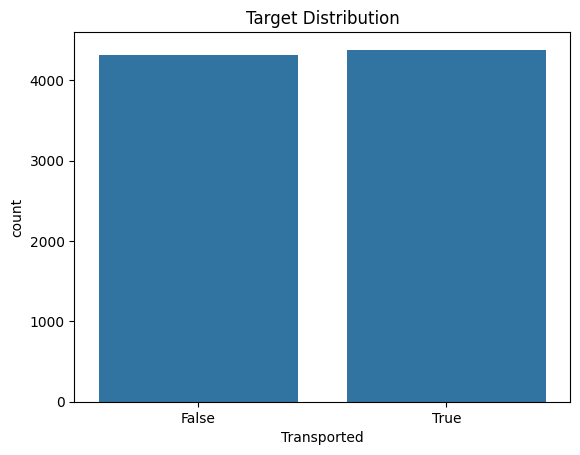

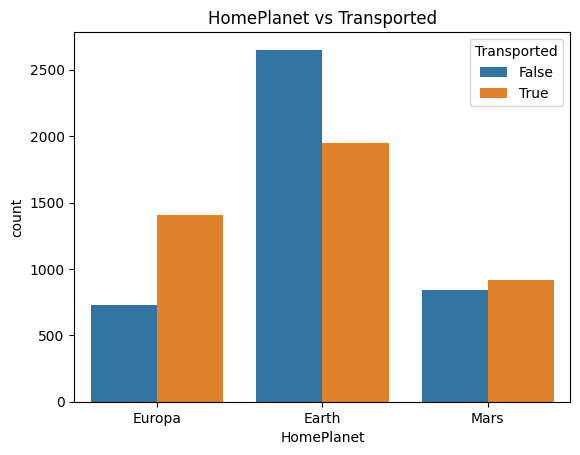

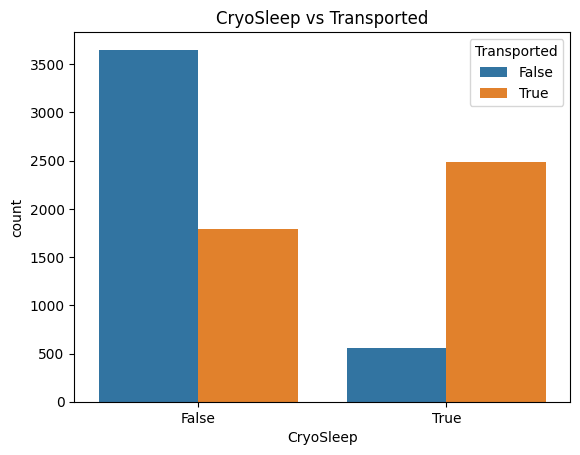

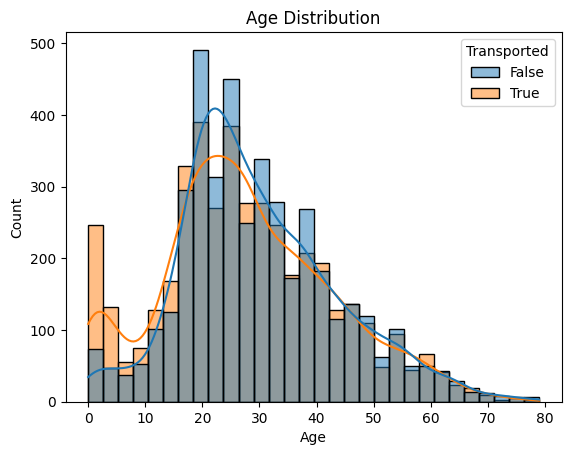

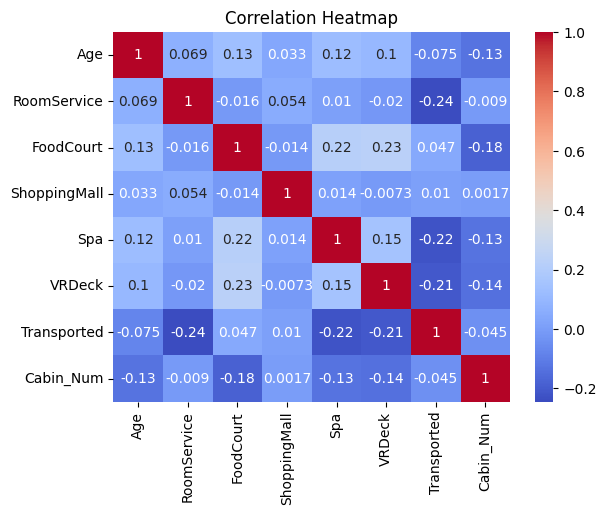

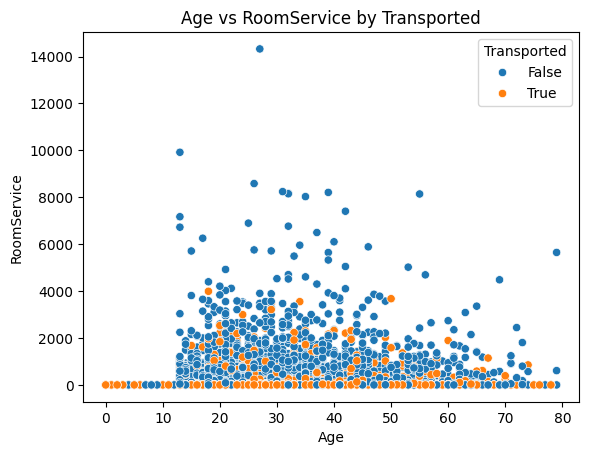

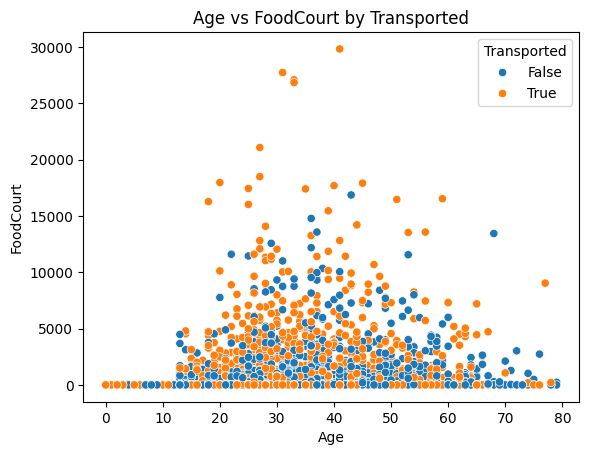

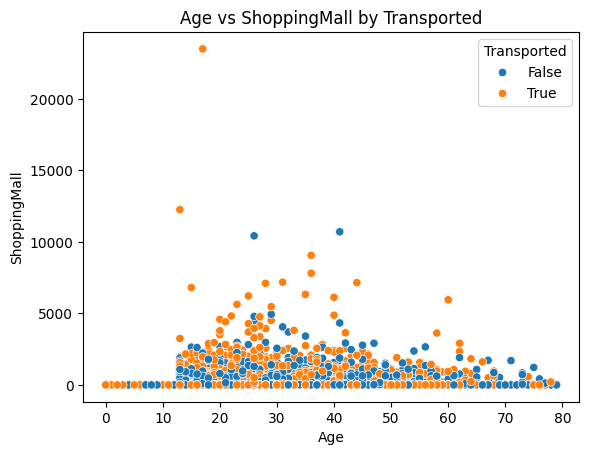

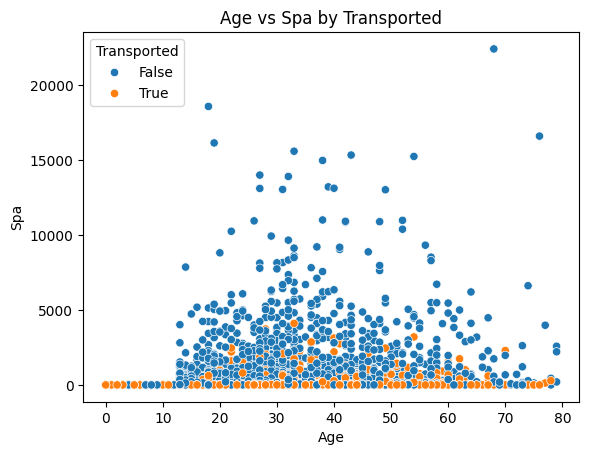

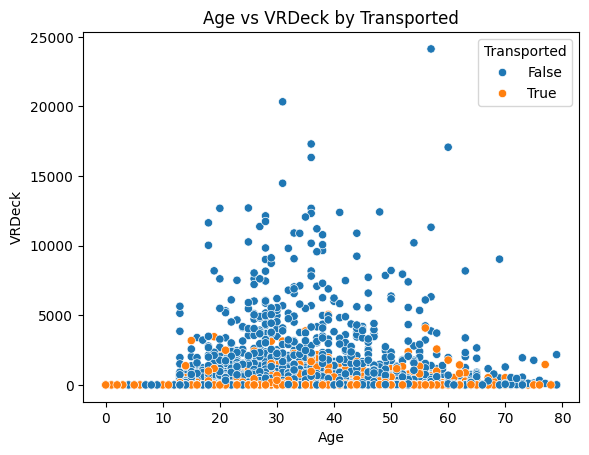

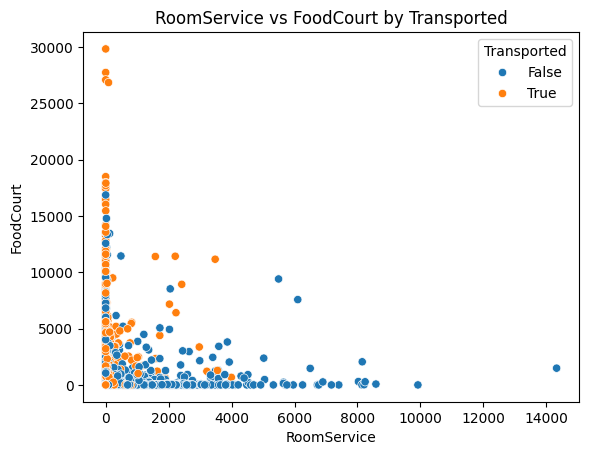

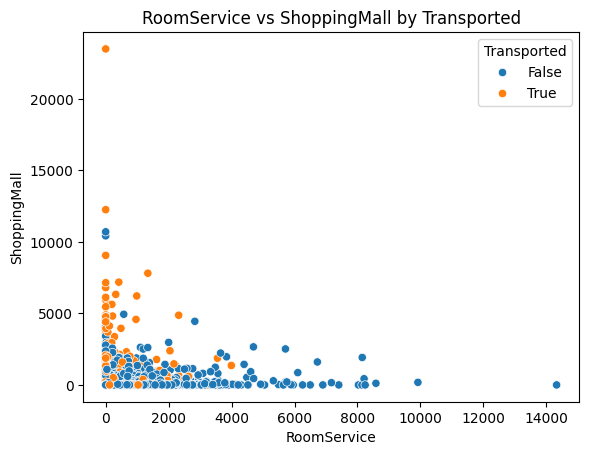

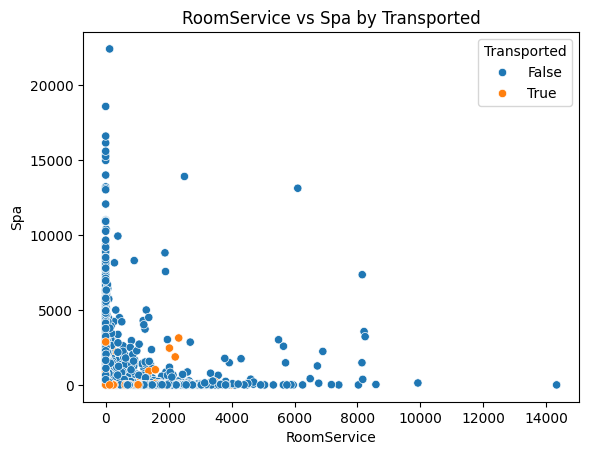

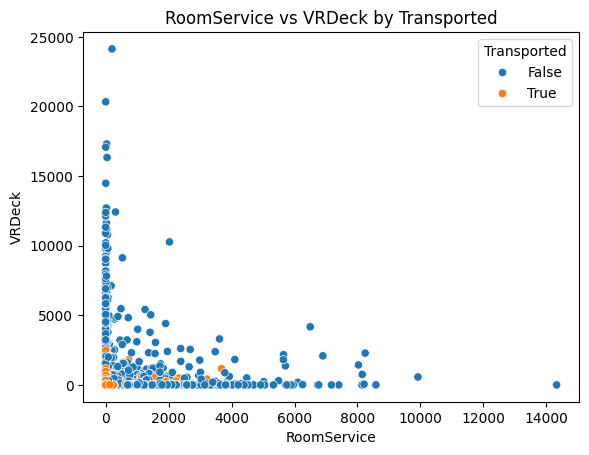

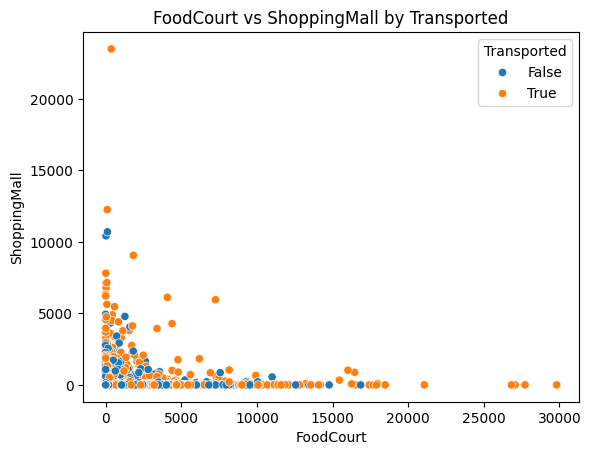

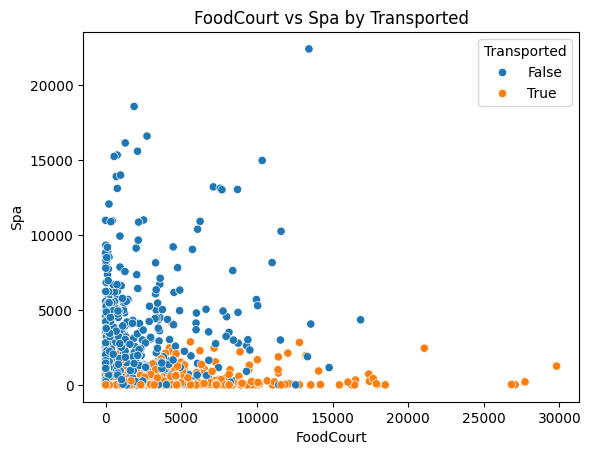

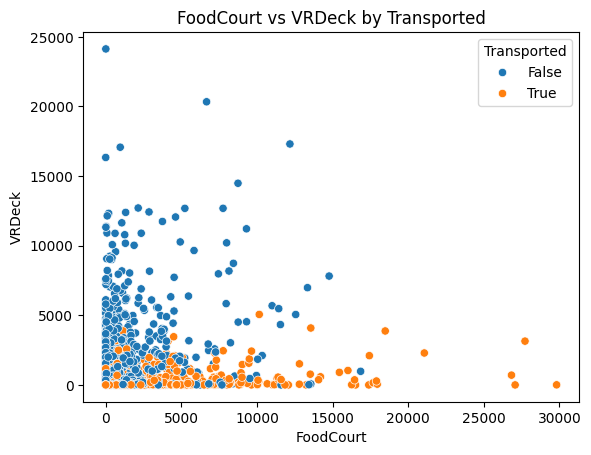

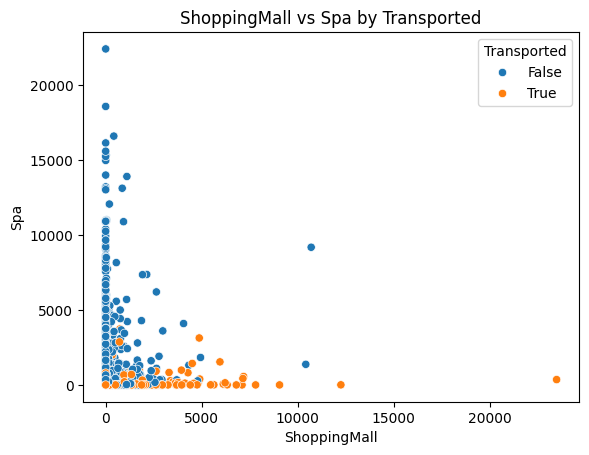

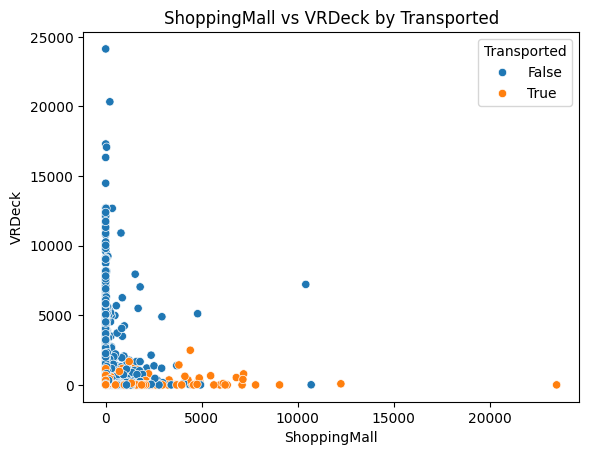

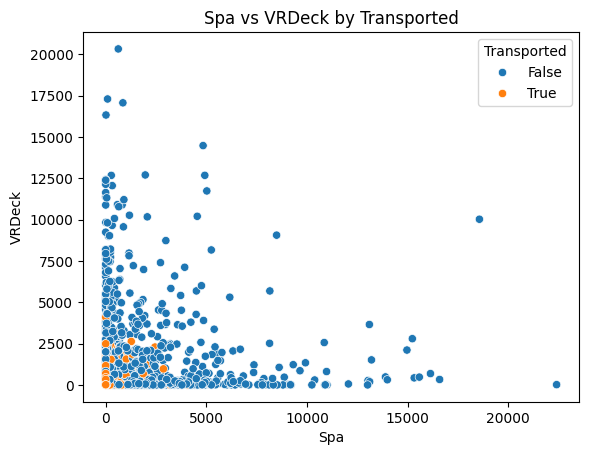

In [12]:

sns.countplot(x='Transported', data=df_train)
plt.title("Target Distribution")
plt.show()

sns.countplot(x='HomePlanet', hue='Transported', data=df_train)
plt.title("HomePlanet vs Transported")
plt.show()

sns.countplot(x='CryoSleep', hue='Transported', data=df_train)
plt.title("CryoSleep vs Transported")
plt.show()

sns.histplot(x='Age', data=df_train, bins=30, kde=True, hue='Transported')
plt.title("Age Distribution")
plt.show()

sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):
        sns.scatterplot(
            data=df_train,
            x=num_features[i],
            y=num_features[j],
            hue='Transported'
        )
        plt.title(f"{num_features[i]} vs {num_features[j]} by Transported")
        plt.show()

#EDA Visualizations on Test Data

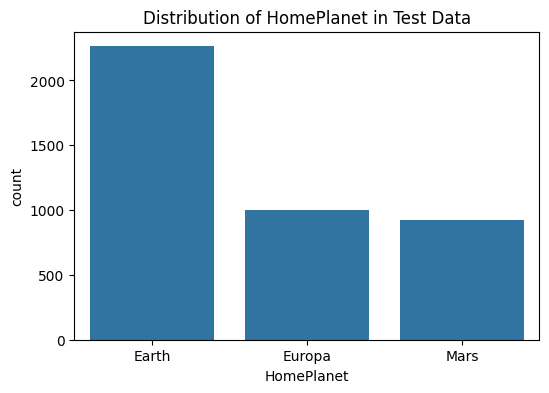

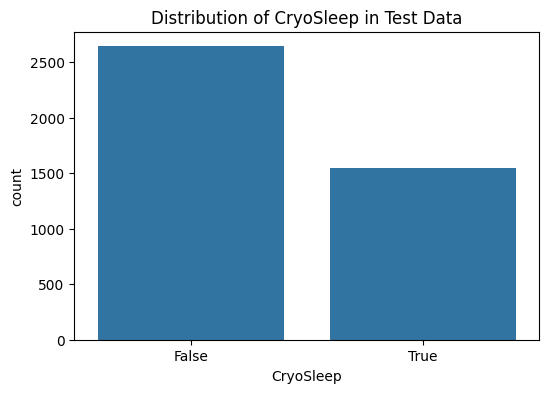

In [13]:
# Visualize the distribution of 'HomePlanet' in test data
plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='HomePlanet')
plt.title('Distribution of HomePlanet in Test Data')
plt.show()

# Visualize the distribution of 'CryoSleep' in test data
plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='CryoSleep')
plt.title('Distribution of CryoSleep in Test Data')
plt.show()


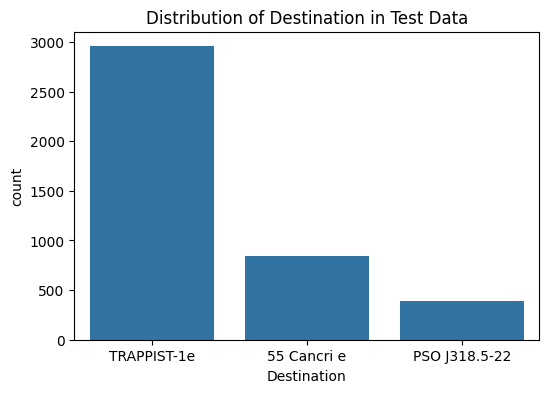

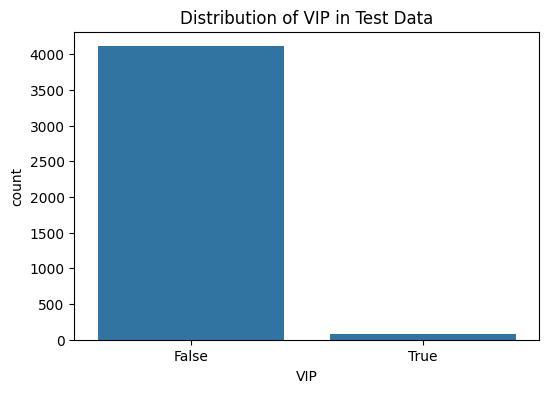

In [14]:
# Visualize the distribution of 'Destination' in test data
plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='Destination')
plt.title('Distribution of Destination in Test Data')
plt.show()

# Visualize the distribution of 'VIP' in test data
plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='VIP')
plt.title('Distribution of VIP in Test Data')
plt.show()

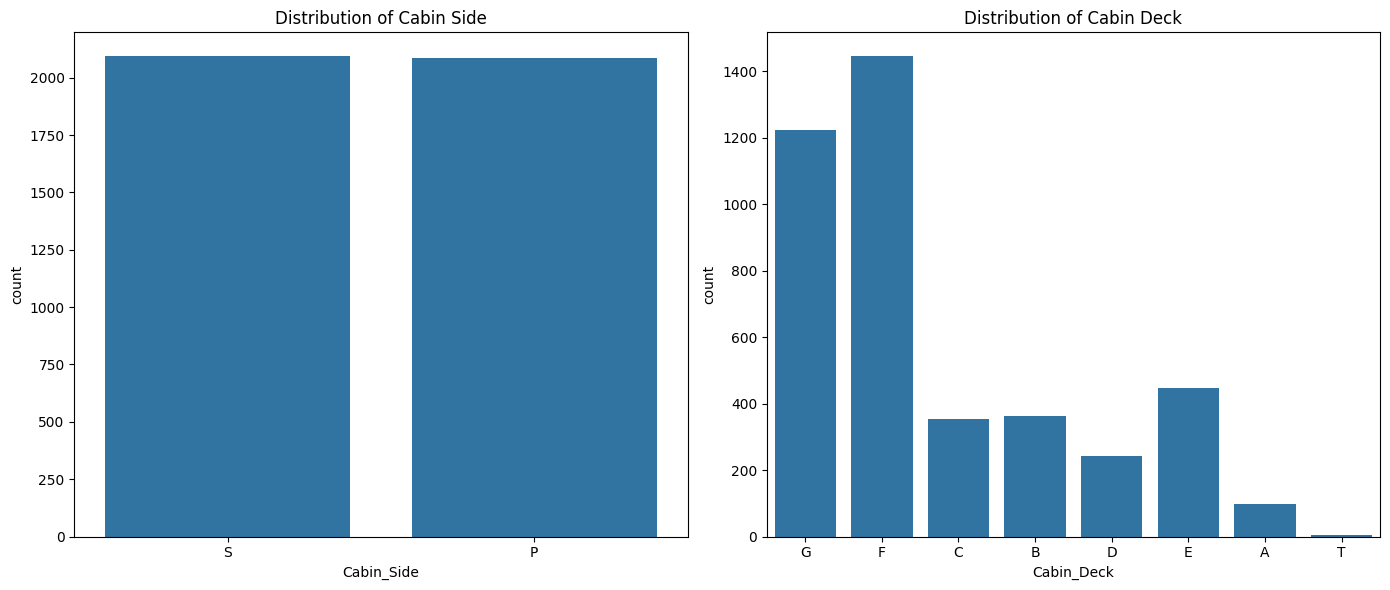

In [15]:
# Visualize the distribution of 'Cabin Side' and 'Cabin Deck'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df_test, x='Cabin_Side', ax=axes[0])
axes[0].set_title('Distribution of Cabin Side')

sns.countplot(data=df_test, x='Cabin_Deck', ax=axes[1])
axes[1].set_title('Distribution of Cabin Deck')

plt.tight_layout()
plt.show()

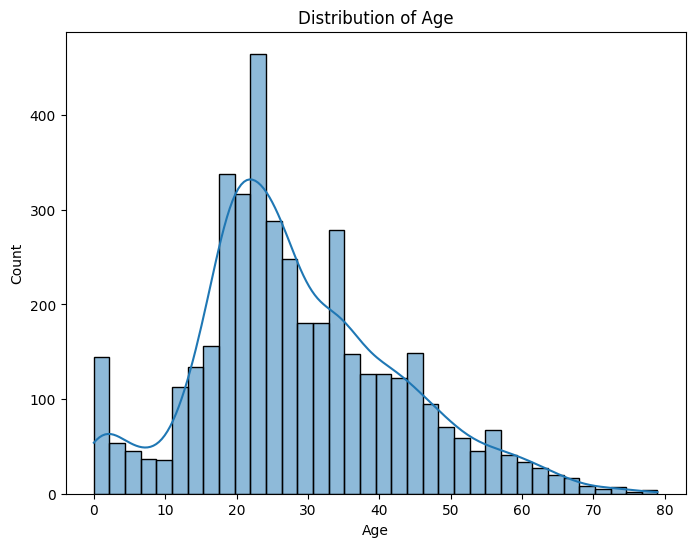

In [16]:
# Visualize the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_test, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

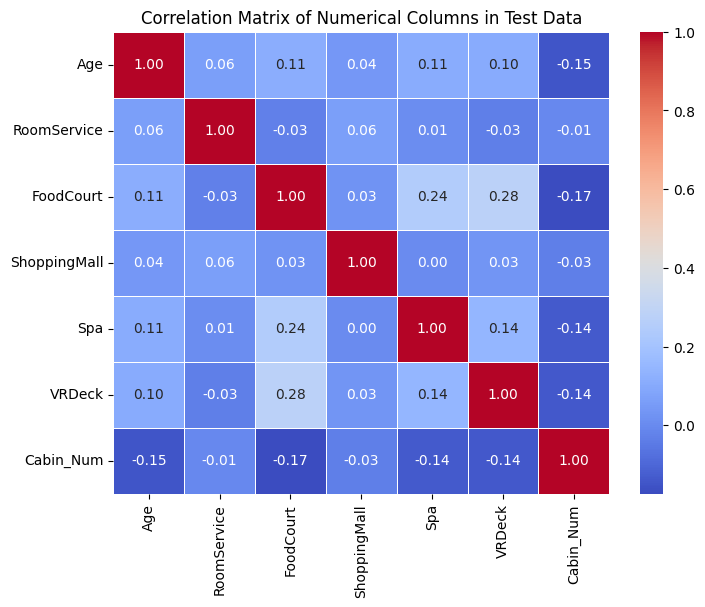

In [17]:
# Calculate the correlation matrix for numerical columns for test data
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']
correlation_matrix_test = df_test[numerical_cols].corr()

# Visualize the correlation matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns in Test Data')
plt.show()

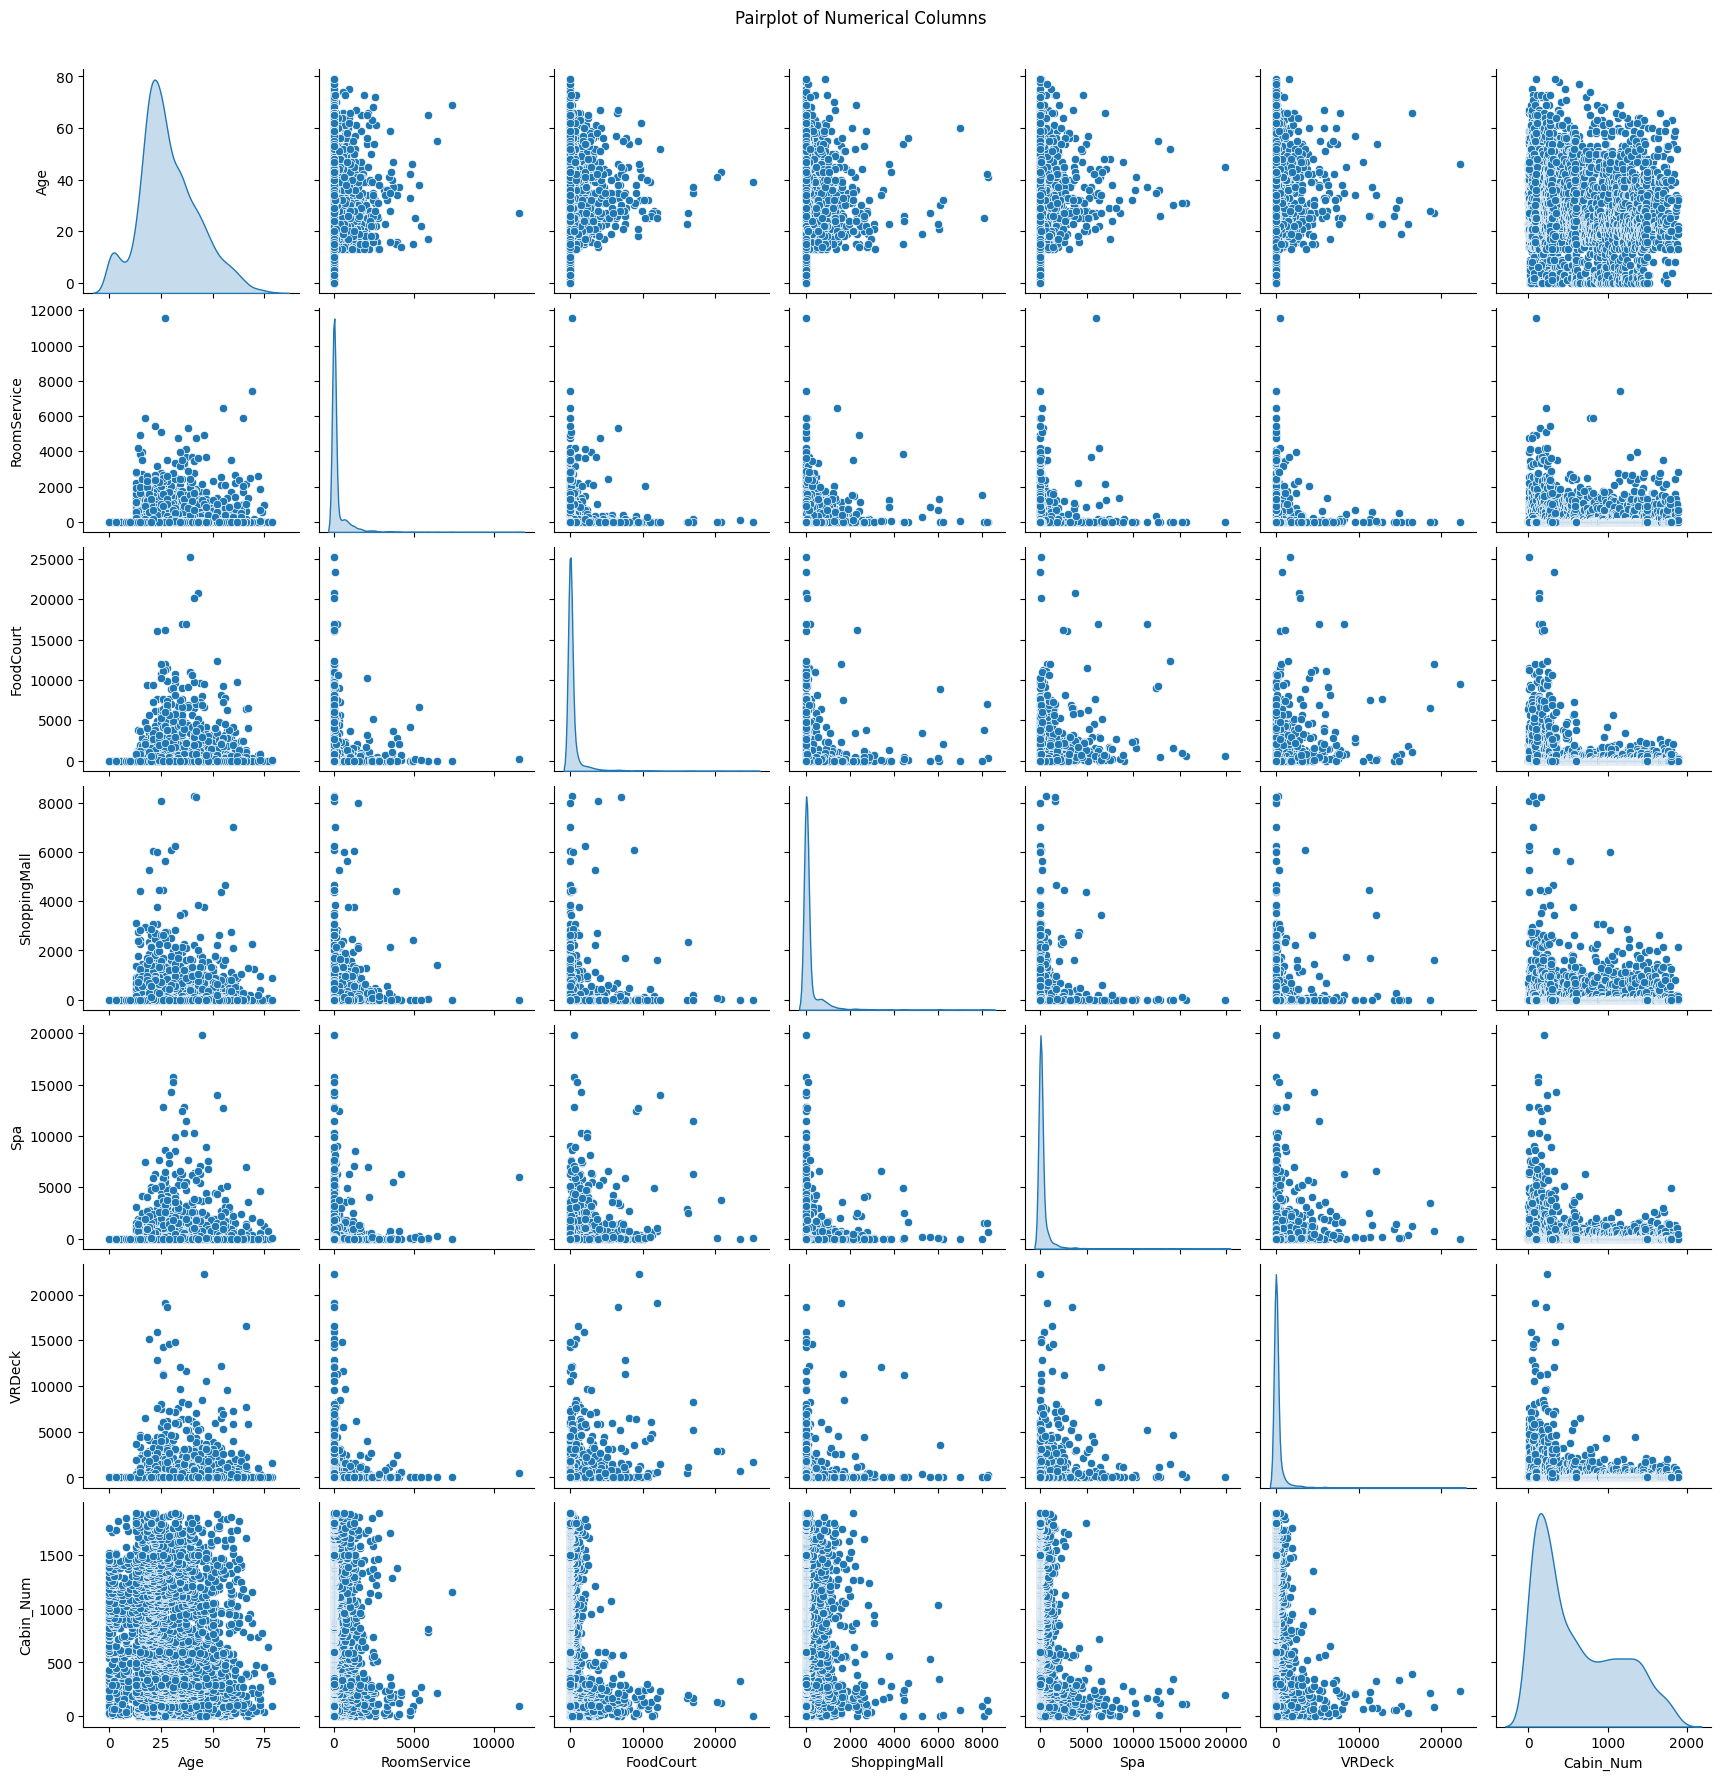

In [18]:
# Create a pairplot for numerical columns
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']
sns.pairplot(df_test, vars=numerical_cols, kind= 'scatter', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

# Pre-processing the data

## Handling Missing Values
Handle missing values in the training and test datasets.

In [19]:
# Re-check for missing values in the training data
print("Missing values in train data after cabin extraction:")
train_missing_after_cabin = df_train.isnull().sum()
train_missing_info_after_cabin = pd.DataFrame({'Missing Count': train_missing_after_cabin})
display(train_missing_info_after_cabin[train_missing_info_after_cabin['Missing Count'] > 0])

# Re-check for missing values in the test data
print("\nMissing values in test data after cabin extraction:")
test_missing_after_cabin = df_test.isnull().sum()
test_missing_info_after_cabin = pd.DataFrame({'Missing Count': test_missing_after_cabin})
display(test_missing_info_after_cabin[test_missing_info_after_cabin['Missing Count'] > 0])

# Display data types of all columns
print("\nTrain data info after cabin extraction:")
df_train.info()

print("\nTest data info after cabin extraction:")
df_test.info()

Missing values in train data after cabin extraction:


,Missing Count
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183



Missing values in test data after cabin extraction:


,Missing Count
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98
Spa,101



Train data info after cabin extraction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_Deck    8494 non-null   object 
 15  Cabin_Num     8494 non-null   float64
 16  Cabin_Side    8494 non-null   object 
dtypes: bool(1), float64(7), object

In [20]:
# Drop some columns
train_df = df_train.drop(['PassengerId', 'Cabin', 'Name', 'Cabin_Deck','Cabin_Num'], axis=1)
test_df = df_test.drop(['PassengerId', 'Cabin', 'Name', 'Cabin_Deck','Cabin_Num'], axis=1)

print(train_df.head())
print(test_df.head())

  HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Cabin_Side  
0           0.0     0.0     0.0        False          P  
1          25.0   549.0    44.0         True          S  
2           0.0  6715.0    49.0        False          S  
3         371.0  3329.0   193.0        False          S  
4         151.0   565.0     2.0         True          S  
  HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0      Earth      True  TRAPPIST-1e  27.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  19.0  

# Imputation Method : Simple Imputation

In [21]:
# Identify numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# Simple Imputation (Median for numerical, Mode for categorical)
train_df_simple_imputed = train_df.copy()
test_df_simple_imputed = test_df.copy()

for col in numerical_cols:
    train_df_simple_imputed[col].fillna(train_df_simple_imputed[col].median(), inplace=True)
    test_df_simple_imputed[col].fillna(test_df_simple_imputed[col].median(), inplace=True)

for col in categorical_cols:
    train_df_simple_imputed[col].fillna(train_df_simple_imputed[col].mode()[0], inplace=True)
    test_df_simple_imputed[col].fillna(test_df_simple_imputed[col].mode()[0], inplace=True)

print("Missing values in train data after simple imputation:")
display(train_df_simple_imputed.isnull().sum())

print("\nMissing values in test data after simple imputation:")
display(test_df_simple_imputed.isnull().sum())

Missing values in train data after simple imputation:


/tmp/ipython-input-2398838474.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2398838474.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0



Missing values in test data after simple imputation:


,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


## Encoding the categorical features after simple imputation

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Identify columns for different encoding methods
onehot_cols = ['HomePlanet', 'Destination', 'Cabin_Side']
ordinal_cols = ['VIP', 'CryoSleep']

# Apply One-Hot Encoding
train_df_encoded = pd.get_dummies(train_df_simple_imputed, columns=onehot_cols, drop_first=True)
test_df_encoded = pd.get_dummies(test_df_simple_imputed, columns=onehot_cols, drop_first=True)

# Apply Ordinal Encoding
encoder = OrdinalEncoder()

train_df_encoded[ordinal_cols] = encoder.fit_transform(train_df_simple_imputed[ordinal_cols])
test_df_encoded[ordinal_cols] = encoder.transform(test_df_simple_imputed[ordinal_cols])


print("Encoded train data shape:", train_df_encoded.shape)
print("Encoded test data shape:", test_df_encoded.shape)

print("\nEncoded train data head:")
display(train_df_encoded.head())

print("\nEncoded test data head:")
display(test_df_encoded.head())

Encoded train data shape: (8693, 14)
Encoded test data shape: (4277, 13)

Encoded train data head:


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Side_S
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True,True
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,True,True
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,True,True
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True,True



Encoded test data head:


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Side_S
0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,True
1,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,False,False,False,True,True
2,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,True
3,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,True,False,False,True,True
4,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,False,False,False,True,True


## Scaling the encoded data

In [23]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the encoded dataframes
# Exclude the target variable 'Transported' from scaling in the training data
numerical_cols_encoded_train = train_df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'Transported' in numerical_cols_encoded_train:
    numerical_cols_encoded_train.remove('Transported')

numerical_cols_encoded_test = test_df_encoded.select_dtypes(include=np.number).columns.tolist()


# Apply StandardScaler
scaler = StandardScaler()

train_df_scaled = train_df_encoded.copy()
test_df_scaled = test_df_encoded.copy()

train_df_scaled[numerical_cols_encoded_train] = scaler.fit_transform(train_df_encoded[numerical_cols_encoded_train])
test_df_scaled[numerical_cols_encoded_test] = scaler.transform(test_df_encoded[numerical_cols_encoded_test])

print("Scaled train data head:")
display(train_df_scaled.head())

print("\nScaled test data head:")
display(test_df_scaled.head())

Scaled train data head:


,CryoSleep,Age,VIP,RoomService,FoodCourt,...,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Side_S
0,-0.73277,0.711945,-0.153063,-0.333105,-0.281027,...,True,False,False,True,False
1,-0.73277,-0.334037,-0.153063,-0.168073,-0.275387,...,False,False,False,True,True
2,-0.73277,2.036857,6.533255,-0.268001,1.959998,...,True,False,False,True,True
3,-0.73277,0.293552,-0.153063,-0.333105,0.523010,...,True,False,False,True,True
4,-0.73277,-0.891895,-0.153063,0.125652,-0.237159,...,False,False,False,True,True



Scaled test data head:


,CryoSleep,Age,VIP,RoomService,FoodCourt,...,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Side_S
0,1.364685,-0.124841,-0.153063,-0.333105,-0.281027,...,False,False,False,True,True
1,-0.732770,-0.682698,-0.153063,-0.333105,-0.275387,...,False,False,False,True,True
2,1.364685,0.154088,-0.153063,-0.333105,-0.281027,...,True,False,False,False,True
3,-0.732770,0.642213,-0.153063,-0.333105,3.887680,...,True,False,False,True,True
4,-0.732770,-0.612966,-0.153063,-0.317964,-0.281027,...,False,False,False,True,True


# Models on Simple Imputation

## Model 1: XGB on simple imputation method

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = train_df_scaled.drop('Transported', axis=1)
y = train_df_scaled['Transported']

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8005464480874317


In [25]:
# Train the final model with the best parameters
final_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params)
final_xgb_model.fit(X_train, y_train)

# Make predictions on the validation set using the final model
y_pred_val = final_xgb_model.predict(X_val)

# Evaluate the final model
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy with Best Parameters: {accuracy}")

Validation Accuracy with Best Parameters: 0.78205865439908


Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.72      0.77       861
        True       0.75      0.84      0.80       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



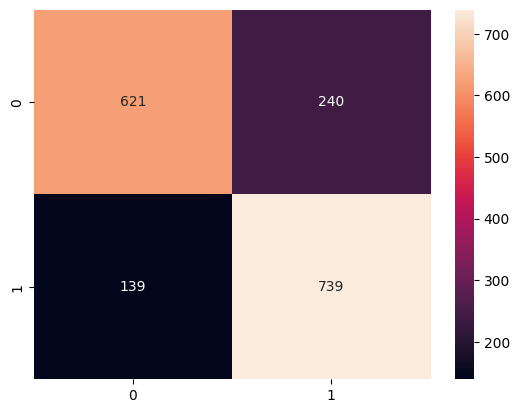

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt=".0f")

# Generate the classification report
class_report = classification_report(y_val, y_pred_val)
print("\nClassification Report:")
print(class_report)

### Prediction on test data

In [27]:
# Make predictions on the test data
test_predictions = final_xgb_model.predict(test_df_scaled)

# Create a submission DataFrame
submission_df = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': test_predictions})

# Convert the boolean predictions to the required format (True/False)
submission_df['Transported'] = submission_df['Transported'].astype(bool)

print("Submission DataFrame:")
display(submission_df.head())

# Save the submission file
submission_df.to_csv('submission_xgb.csv', index=False)

print("Submission file created successfully!")

Submission DataFrame:


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


Submission file created successfully!


### Shap Analysis and Feature Importance

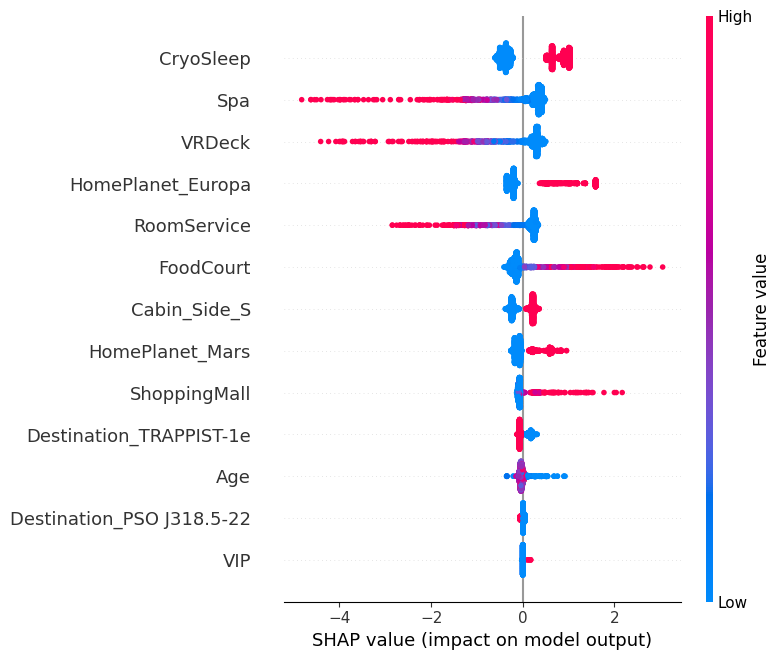

In [28]:
import shap

# Create a TreeExplainer
explainer = shap.TreeExplainer(final_xgb_model)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

# Visualize the SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X_val)

Feature Importances:
CryoSleep                    0.549790
RoomService                  0.076698
HomePlanet_Europa            0.076241
VRDeck                       0.063784
Spa                          0.062443
HomePlanet_Mars              0.040865
FoodCourt                    0.030809
Cabin_Side_S                 0.027533
ShoppingMall                 0.023968
Age                          0.018690
Destination_PSO J318.5-22    0.012936
Destination_TRAPPIST-1e      0.009787
VIP                          0.006456
dtype: float32


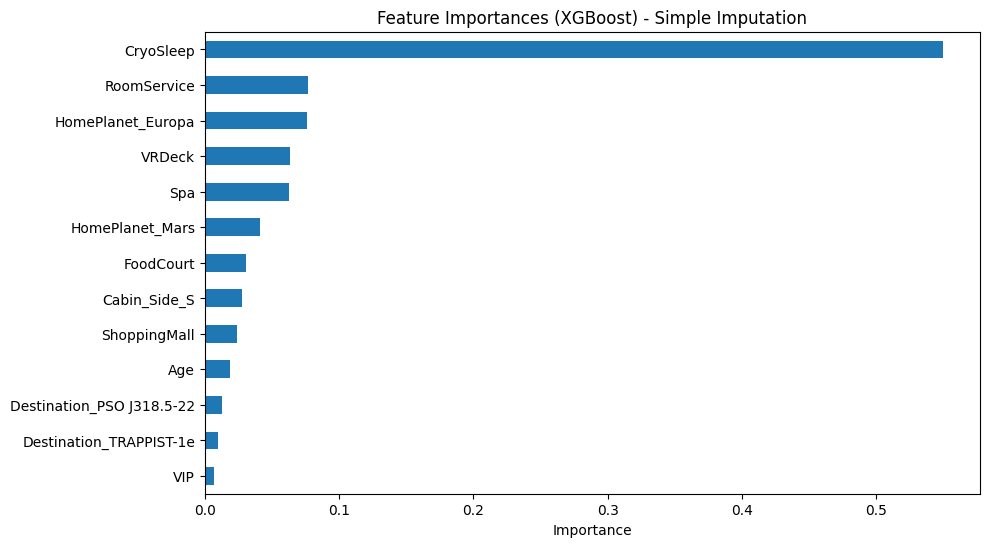

In [29]:
# Get feature importances from the trained XGBoost model
feature_importances = final_xgb_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='barh')
plt.title('Feature Importances (XGBoost) - Simple Imputation')
plt.xlabel('Importance') # Changed y-label to x-label for horizontal bar plot
plt.gca().invert_yaxis() # Invert y-axis to show most important features at the top
plt.show()

## Model 2: Random Forest on simple imputation method

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_model_grid = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model_grid, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_score = grid_search_rf.best_score_

print(f"Random Forest Best Parameters: {best_params_rf}")
print(f"Random Forest Best Cross-Validation Accuracy: {best_score_rf}")

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Best Cross-Validation Accuracy: 0.8024158757549612


Random Forest Validation Accuracy: 0.7849338700402531

Random Forest Confusion Matrix:


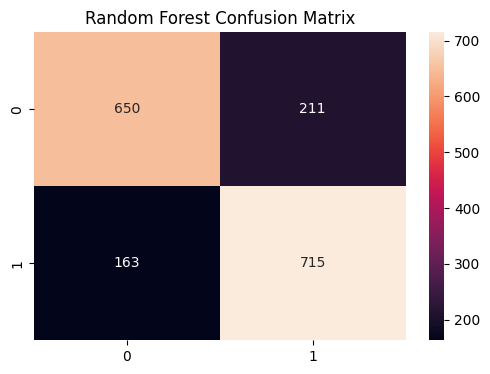


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.75      0.78       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [31]:
# Train the final Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
final_rf_model.fit(X_train, y_train)


# Make predictions on the validation set
y_pred_val_rf = final_rf_model.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")

# Generate and display the confusion matrix
conf_matrix_rf = confusion_matrix(y_val, y_pred_val_rf)
print("\nRandom Forest Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt=".0f")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Generate and print the classification report
class_report_rf = classification_report(y_val, y_pred_val_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

### Prediction on test data

In [32]:
# Make predictions on the test data (for submission)
test_predictions_rf = final_rf_model.predict(test_df_scaled)

# Create a submission DataFrame
submission_df_rf = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': test_predictions_rf.astype(bool)})
submission_df_rf.to_csv('submission_rf.csv', index=False)
print("\nRandom Forest Submission file created successfully!")


Random Forest Submission file created successfully!


### Shap Analysis and Feature Importance

100%|===================| 3468/3478 [02:28<00:00]       


Random Forest SHAP Summary Plot:


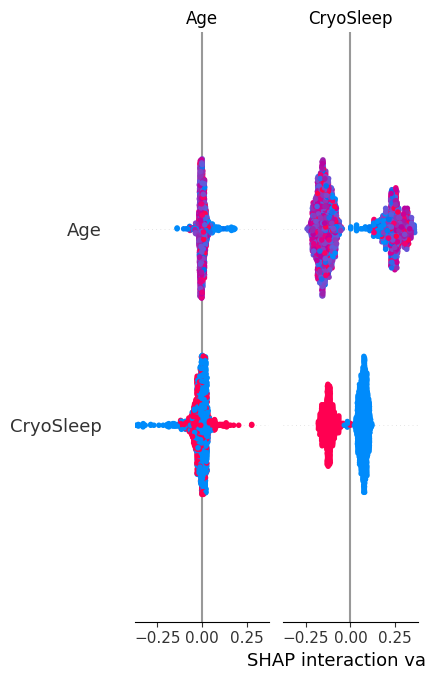

In [33]:
# For Random Forest, using shap.Explainer with a background dataset is often more efficient
# We can use a sample of the training data as the background
background_data = X_train.sample(100, random_state=42) # Use a smaller sample for faster computation

# Convert boolean columns to int for SHAP in background_data
background_data_numeric = background_data.copy()
for col in background_data_numeric.columns:
    if background_data_numeric[col].dtype == 'bool':
        background_data_numeric[col] = background_data_numeric[col].astype(int)

# Convert boolean columns to int for SHAP in X_val
X_val_numeric = X_val.copy()
for col in X_val_numeric.columns:
    if X_val_numeric[col].dtype == 'bool':
        X_val_numeric[col] = X_val_numeric[col].astype(int)

# Create a SHAP Explainer
explainer_rf = shap.Explainer(final_rf_model, background_data_numeric)

# Calculate SHAP values for the validation set
shap_values_rf = explainer_rf(X_val_numeric)

# Visualize the SHAP values (e.g., summary plot)
print("\nRandom Forest SHAP Summary Plot:")
shap.summary_plot(shap_values_rf, X_val_numeric)


Random Forest Feature Importances:
CryoSleep                    0.169115
Spa                          0.161217
VRDeck                       0.138187
RoomService                  0.132449
FoodCourt                    0.107338
ShoppingMall                 0.084768
Age                          0.083973
HomePlanet_Europa            0.057746
HomePlanet_Mars              0.028747
Cabin_Side_S                 0.016942
Destination_TRAPPIST-1e      0.009933
Destination_PSO J318.5-22    0.006977
VIP                          0.002609
dtype: float64


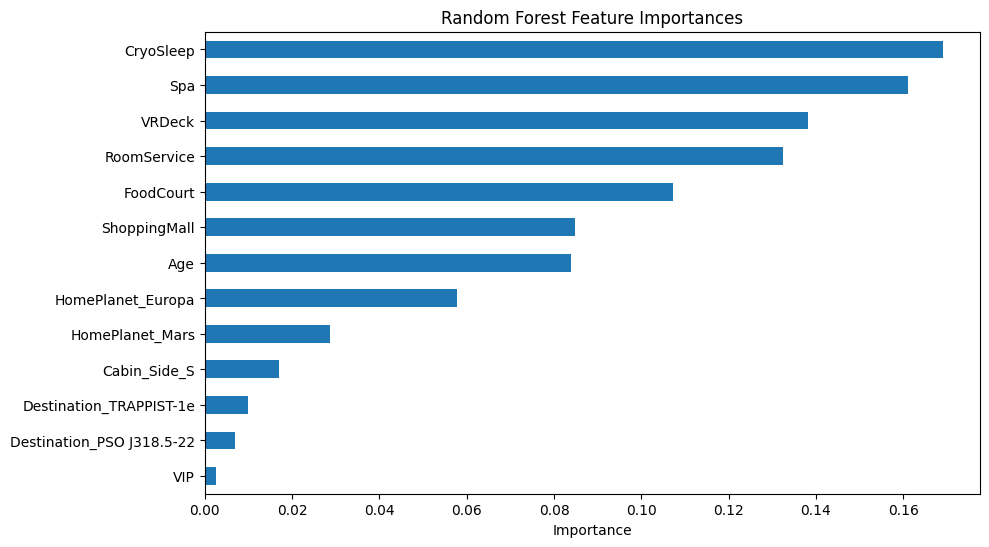

In [34]:
# Get and visualize feature importances
feature_importances_rf = final_rf_model.feature_importances_
feature_importances_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("\nRandom Forest Feature Importances:")
print(sorted_feature_importances_rf)

plt.figure(figsize=(10, 6))
sorted_feature_importances_rf.plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

# Imputation Method: KNN Imputation

In [35]:
# Re-check for missing values in the training data (before simple imputation)
print("Missing values in original train data:")
train_missing_original = df_train.isnull().sum()
train_missing_info_original = pd.DataFrame({'Missing Count': train_missing_original})
display(train_missing_info_original[train_missing_info_original['Missing Count'] > 0])

# Re-check for missing values in the test data (before simple imputation)
print("\nMissing values in original test data:")
test_missing_original = df_test.isnull().sum()
test_missing_info_original = pd.DataFrame({'Missing Count': test_missing_original})
display(test_missing_info_original[test_missing_info_original['Missing Count'] > 0])

Missing values in original train data:


,Missing Count
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183



Missing values in original test data:


,Missing Count
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98
Spa,101


In [36]:
# Create copies of the dropped dataframes for KNN imputation
train_df_knn = train_df.copy()
test_df_knn = test_df.copy()

# Separate target variable
y_knn = None
if 'Transported' in train_df_knn.columns:
    y_knn = train_df_knn['Transported']
    train_df_knn = train_df_knn.drop('Transported', axis=1)

# Identify numerical and categorical columns AFTER dropping the target
numerical_cols_impute = train_df_knn.select_dtypes(include=np.number).columns.tolist()
categorical_cols_impute = train_df_knn.select_dtypes(include='object').columns.tolist()

print("Original numerical columns for imputation:", numerical_cols_impute)
print("Original categorical columns for imputation:", categorical_cols_impute)

Original numerical columns for imputation: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Original categorical columns for imputation: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Side']


In [37]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Create a temporary dataframe with categorical columns encoded numerically for KNN imputation
train_df_knn_temp = train_df_knn.copy()
test_df_knn_temp = test_df_knn.copy()

# Use OrdinalEncoder for temporary encoding of categorical features for KNNImputer
temp_ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training data and transform both train and test
if categorical_cols_impute:
    train_df_knn_temp[categorical_cols_impute] = temp_ordinal_encoder.fit_transform(train_df_knn_temp[categorical_cols_impute])
    test_df_knn_temp[categorical_cols_impute] = temp_ordinal_encoder.transform(test_df_knn_temp[categorical_cols_impute])

print("Temporary dataframes after ordinal encoding for KNN imputation:")
display(train_df_knn_temp.head())
display(test_df_knn_temp.head())

Temporary dataframes after ordinal encoding for KNN imputation:


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Side
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,1.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Side
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,1.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1.0


In [38]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to the temporary dataframes (which now contain only numerical or temporarily encoded categorical columns)
train_df_knn_imputed_temp = pd.DataFrame(knn_imputer.fit_transform(train_df_knn_temp), columns=train_df_knn_temp.columns)
test_df_knn_imputed_temp = pd.DataFrame(knn_imputer.transform(test_df_knn_temp), columns=test_df_knn_temp.columns)

print("Dataframes after KNN imputation:")
display(train_df_knn_imputed_temp.head())
display(test_df_knn_imputed_temp.head())

Dataframes after KNN imputation:


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Side
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,1.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Side
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,1.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1.0


In [39]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Now, apply the final encoding (One-Hot and Ordinal) to the KNN imputed dataframes
# The columns in train_df_knn_imputed_temp and test_df_knn_imputed_temp correspond to the original columns

# Identify columns for different encoding methods AFTER KNN imputation
onehot_cols_final = ['HomePlanet', 'Destination', 'Cabin_Side']
ordinal_cols_final = ['VIP', 'CryoSleep']
# Numerical columns are those not in the encoding lists and were originally numerical
numerical_cols_final = [col for col in train_df_knn_imputed_temp.columns if col not in onehot_cols_final + ordinal_cols_final]

print("Columns for One-Hot Encoding:", onehot_cols_final)
print("Columns for Ordinal Encoding:", ordinal_cols_final)
print("Numerical columns after imputation:", numerical_cols_final)

# Apply One-Hot Encoding to the KNN imputed data
train_df_knn_encoded = pd.get_dummies(train_df_knn_imputed_temp, columns=onehot_cols_final, drop_first=True)
test_df_knn_encoded = pd.get_dummies(test_df_knn_imputed_temp, columns=onehot_cols_final, drop_first=True)

# Align columns after one-hot encoding - important for consistent feature sets
train_cols = train_df_knn_encoded.columns
test_cols = test_df_knn_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    test_df_knn_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    train_df_knn_encoded[c] = 0

test_df_knn_encoded = test_df_knn_encoded[train_cols] # Ensure the order of columns is the same

# Apply Ordinal Encoding to the KNN imputed data (for the specified ordinal columns)
final_ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in ordinal_cols_final:
    if col in train_df_knn_encoded.columns:
         train_df_knn_encoded[col] = train_df_knn_encoded[col].astype('object')
    if col in test_df_knn_encoded.columns:
        test_df_knn_encoded[col] = test_df_knn_encoded[col].astype('object')

if ordinal_cols_final:
    final_ordinal_encoder.fit(train_df_knn_encoded[ordinal_cols_final])
    train_df_knn_encoded[ordinal_cols_final] = final_ordinal_encoder.transform(train_df_knn_encoded[ordinal_cols_final])
    test_df_knn_encoded[ordinal_cols_final] = final_ordinal_encoder.transform(test_df_knn_encoded[ordinal_cols_final])


# Re-attach the target variable to the training dataframe
if y_knn is not None:
    train_df_knn_encoded['Transported'] = y_knn.values # Use .values to align index

Columns for One-Hot Encoding: ['HomePlanet', 'Destination', 'Cabin_Side']
Columns for Ordinal Encoding: ['VIP', 'CryoSleep']
Numerical columns after imputation: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [40]:
# Verify imputation and encoding
print("Missing values in train data after KNN imputation and encoding:")
display(train_df_knn_encoded.isnull().sum())

print("\nMissing values in test data after KNN imputation and encoding:")
display(test_df_knn_encoded.isnull().sum())

print("\nEncoded train data shape after KNN imputation and encoding:", train_df_knn_encoded.shape)
print("Encoded test data shape after KNN imputation and encoding:", test_df_knn_encoded.shape)

print("\nEncoded train data head after KNN imputation and encoding:")
display(train_df_knn_encoded.head())

print("\nEncoded test data head after KNN imputation and encoding:")
display(test_df_knn_encoded.head())

Missing values in train data after KNN imputation and encoding:


,0
CryoSleep,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
HomePlanet_0.2,0
HomePlanet_0.4,0



Missing values in test data after KNN imputation and encoding:


,0
CryoSleep,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
HomePlanet_0.2,0
HomePlanet_0.4,0



Encoded train data shape after KNN imputation and encoding: (8693, 33)
Encoded test data shape after KNN imputation and encoding: (4277, 32)

Encoded train data head after KNN imputation and encoding:


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0.2,HomePlanet_0.4,...,Destination_1.4,Destination_1.6,Destination_1.8,Destination_2.0,Cabin_Side_0.2,Cabin_Side_0.4,Cabin_Side_0.6,Cabin_Side_0.8,Cabin_Side_1.0,Transported
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,False,False,...,False,False,False,True,False,False,False,False,True,True
2,0.0,58.0,2.0,43.0,3576.0,0.0,6715.0,49.0,False,False,...,False,False,False,True,False,False,False,False,True,False
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,False,False,...,False,False,False,True,False,False,False,False,True,True



Encoded test data head after KNN imputation and encoding:


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_0.2,HomePlanet_0.4,...,Destination_1.2,Destination_1.4,Destination_1.6,Destination_1.8,Destination_2.0,Cabin_Side_0.2,Cabin_Side_0.4,Cabin_Side_0.6,Cabin_Side_0.8,Cabin_Side_1.0
0,5.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,False,True,False,False,False,False,True
1,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,5.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,False,False,...,False,False,False,False,True,False,False,False,False,True
4,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,False,False,...,False,False,False,False,True,False,False,False,False,True


### Dataset split for training the model

In [41]:
# Separate features and target variable for KNN imputed data
# Assuming 'Transported' is the target variable and is still in the dataframe
X_knn = train_df_knn_encoded.drop('Transported', axis=1)
y_knn = train_df_knn_encoded['Transported']

# Convert target variable to appropriate data type if necessary
# Assuming Transported is boolean or needs to be integer for some models
y_knn = y_knn.astype(int)


# Split the KNN imputed training data for validation
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

print("Shape of X_train_knn:", X_train_knn.shape)
print("Shape of X_val_knn:", X_val_knn.shape)
print("Shape of y_train_knn:", y_train_knn.shape)
print("Shape of y_val_knn:", y_val_knn.shape)

Shape of X_train_knn: (6954, 32)
Shape of X_val_knn: (1739, 32)
Shape of y_train_knn: (6954,)
Shape of y_val_knn: (1739,)


# Models on KNN imputation

## Model 3: XGB on KNN imputation

In [42]:
# Define the parameter grid for GridSearchCV for XGBoost with KNN data
param_grid_knn_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier for KNN data
xgb_model_knn_grid = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV for XGBoost with KNN data
grid_search_knn_xgb = GridSearchCV(estimator=xgb_model_knn_grid, param_grid=param_grid_knn_xgb, cv=3, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search_knn_xgb.fit(X_train_knn, y_train_knn)

# Get the best parameters and best score
best_params_knn_xgb = grid_search_knn_xgb.best_params_
best_score_knn_xgb = grid_search_knn_xgb.best_score_

print(f"XGBoost Best Parameters with KNN Imputation: {best_params_knn_xgb}")
print(f"XGBoost Best Cross-Validation Accuracy with KNN Imputation: {best_score_knn_xgb}")

XGBoost Best Parameters with KNN Imputation: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Best Cross-Validation Accuracy with KNN Imputation: 0.8034224906528618


XGBoost Validation Accuracy with KNN Imputation and Best Parameters: 0.7872340425531915
Confusion Matrix (XGBoost with KNN Imputation):


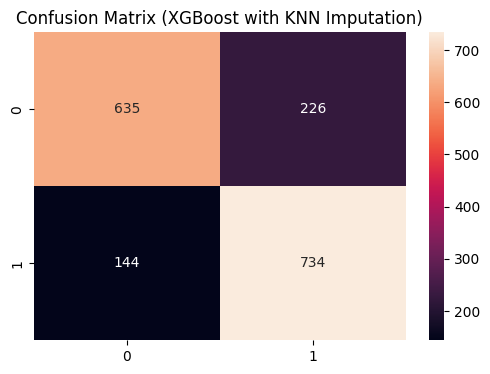


Classification Report (XGBoost with KNN Imputation):
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       861
           1       0.76      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [43]:
# Train the final XGBoost model with the best parameters on KNN data
final_xgb_model_knn = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params_knn_xgb)
final_xgb_model_knn.fit(X_train_knn, y_train_knn)

# Make predictions on the validation set using the final model
y_pred_val_knn_xgb_tuned = final_xgb_model_knn.predict(X_val_knn)

# Evaluate the final model
accuracy_knn_xgb_tuned = accuracy_score(y_val_knn, y_pred_val_knn_xgb_tuned)
print(f"XGBoost Validation Accuracy with KNN Imputation and Best Parameters: {accuracy_knn_xgb_tuned}")

# Generate the confusion matrix
conf_matrix_knn_xgb_tuned = confusion_matrix(y_val_knn, y_pred_val_knn_xgb_tuned)
print("Confusion Matrix (XGBoost with KNN Imputation):")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn_xgb_tuned, annot=True, fmt=".0f")
plt.title("Confusion Matrix (XGBoost with KNN Imputation)")
plt.show()

# Generate the classification report
class_report_knn_xgb_tuned = classification_report(y_val_knn, y_pred_val_knn_xgb_tuned)
print("\nClassification Report (XGBoost with KNN Imputation):")
print(class_report_knn_xgb_tuned)

### Prediction on test data

In [44]:
# Make predictions on the test data using the final model
test_predictions_knn_xgb = final_xgb_model_knn.predict(test_df_knn_encoded)

# Create a submission DataFrame
submission_df_knn_xgb = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': test_predictions_knn_xgb})

# Convert the predictions to boolean type
submission_df_knn_xgb['Transported'] = submission_df_knn_xgb['Transported'].astype(bool)

# Save the submission file
submission_df_knn_xgb.to_csv('submission_knn_xgb.csv', index=False)

print("Kaggle submission file 'submission_knn_xgb.csv' created successfully!")

Kaggle submission file 'submission_knn_xgb.csv' created successfully!


### Shap Analysis and Feature Importance

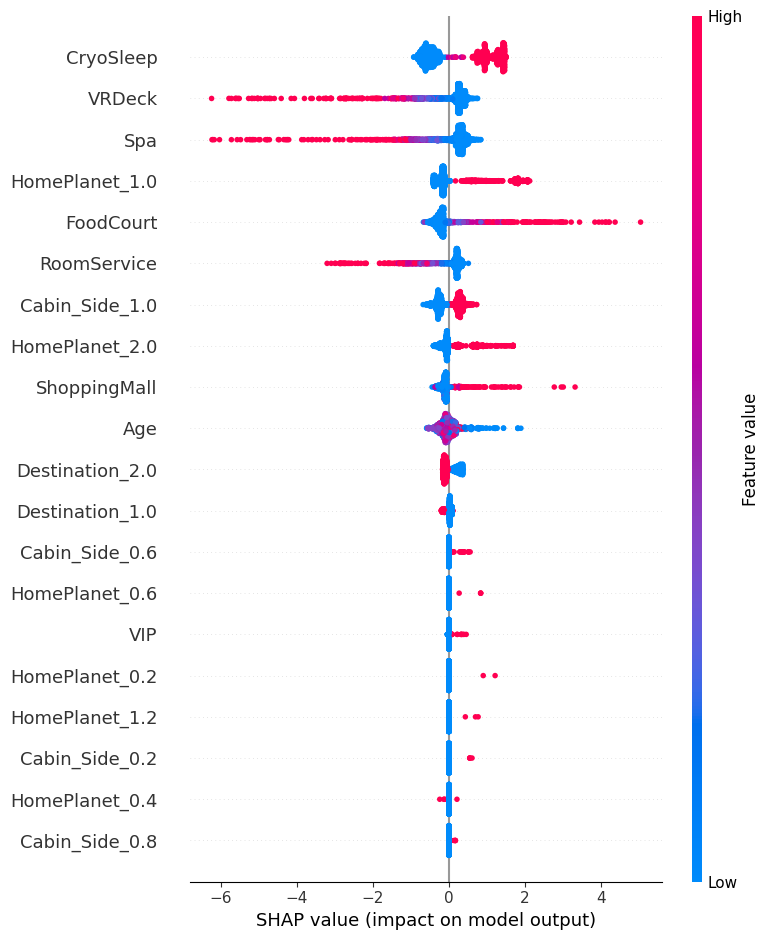

In [45]:
# Create a TreeExplainer
explainer = shap.TreeExplainer(final_xgb_model_knn)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_val_knn)

# Visualize the SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X_val_knn)

Feature Importances:
CryoSleep          0.653041
HomePlanet_1.0     0.069076
HomePlanet_2.0     0.042080
VRDeck             0.035886
Spa                0.030969
RoomService        0.028578
Cabin_Side_1.0     0.024802
FoodCourt          0.023004
ShoppingMall       0.018467
Age                0.011828
Destination_2.0    0.011014
Destination_1.0    0.008551
VIP                0.007516
HomePlanet_0.6     0.006683
HomePlanet_0.4     0.005931
Cabin_Side_0.8     0.005203
HomePlanet_0.2     0.004464
Cabin_Side_0.2     0.004339
Cabin_Side_0.6     0.003784
HomePlanet_0.8     0.002562
HomePlanet_1.2     0.002222
HomePlanet_1.4     0.000000
HomePlanet_1.6     0.000000
Destination_0.4    0.000000
Destination_1.4    0.000000
Destination_1.2    0.000000
Destination_0.8    0.000000
Destination_0.6    0.000000
Destination_0.2    0.000000
Destination_1.8    0.000000
Destination_1.6    0.000000
Cabin_Side_0.4     0.000000
dtype: float32


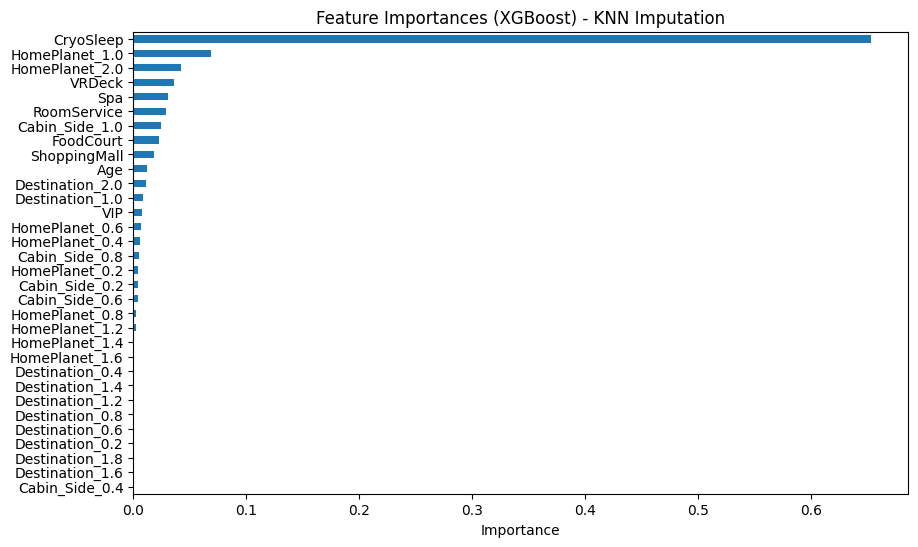

In [46]:
# Get feature importances from the trained XGBoost model
feature_importances = final_xgb_model_knn.feature_importances_

# Create a pandas Series for easier visualization
feature_importances_series = pd.Series(feature_importances, index=X_train_knn.columns)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='barh')
plt.title('Feature Importances (XGBoost) - KNN Imputation')
plt.xlabel('Importance') # Changed y-label to x-label for horizontal bar plot
plt.gca().invert_yaxis() # Invert y-axis to show most important features at the top
plt.show()

## Model 4: Random Forest on KNN imputation method

In [47]:
# Define the parameter grid for GridSearchCV for Random Forest with KNN data
param_grid_knn_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier for KNN data
rf_model_knn_grid = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest with KNN data
grid_search_knn_rf = GridSearchCV(estimator=rf_model_knn_grid, param_grid=param_grid_knn_rf, cv=3, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search_knn_rf.fit(X_train_knn, y_train_knn)

# Get the best parameters and best score
best_params_knn_rf = grid_search_knn_rf.best_params_
best_score_knn_rf = grid_search_knn_rf.best_score_

print(f"Random Forest Best Parameters with KNN Imputation: {best_params_knn_rf}")
print(f"Random Forest Best Cross-Validation Accuracy with KNN Imputation: {best_score_knn_rf}")

Random Forest Best Parameters with KNN Imputation: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Best Cross-Validation Accuracy with KNN Imputation: 0.8034224906528618


Random Forest Validation Accuracy with KNN Imputation and Best Parameters: 0.7849338700402531

Random Forest Confusion Matrix (Random Forest with KNN Imputation):


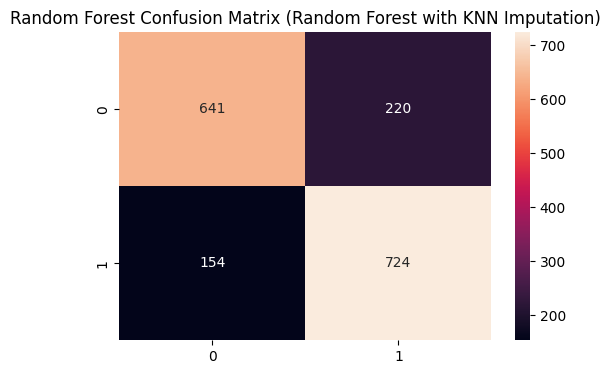


Random Forest Classification Report (Random Forest with KNN Imputation):
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [48]:
# Train the final Random Forest model with the best parameters on KNN data
final_rf_model_knn = RandomForestClassifier(random_state=42, **best_params_knn_rf)
final_rf_model_knn.fit(X_train_knn, y_train_knn)


# Make predictions on the validation set
y_pred_val_knn_rf_tuned = final_rf_model_knn.predict(X_val_knn)

# Evaluate the model
accuracy_knn_rf_tuned = accuracy_score(y_val_knn, y_pred_val_knn_rf_tuned)
print(f"Random Forest Validation Accuracy with KNN Imputation and Best Parameters: {accuracy_knn_rf_tuned}")

# Generate and display the confusion matrix
conf_matrix_knn_rf_tuned = confusion_matrix(y_val_knn, y_pred_val_knn_rf_tuned)
print("\nRandom Forest Confusion Matrix (Random Forest with KNN Imputation):")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn_rf_tuned, annot=True, fmt=".0f")
plt.title("Random Forest Confusion Matrix (Random Forest with KNN Imputation)")
plt.show()

# Generate and print the classification report
class_report_knn_rf_tuned = classification_report(y_val_knn, y_pred_val_knn_rf_tuned)
print("\nRandom Forest Classification Report (Random Forest with KNN Imputation):")
print(class_report_knn_rf_tuned)

### Prediction on test data

In [49]:
# Make predictions on the test data using the final Random Forest model trained with KNN imputation
test_predictions_knn_rf = final_rf_model_knn.predict(test_df_knn_encoded)

# Create a submission DataFrame for Kaggle
submission_df_knn_rf = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': test_predictions_knn_rf})

# Convert the predictions to boolean type
submission_df_knn_rf['Transported'] = submission_df_knn_rf['Transported'].astype(bool)

# Save the submission file
submission_df_knn_rf.to_csv('submission_knn_rf.csv', index=False)

print("Kaggle submission file 'submission_knn_rf.csv' created successfully!")

Kaggle submission file 'submission_knn_rf.csv' created successfully!


### SHAP and Feature Importance

100%|===================| 3463/3478 [02:58<00:00]       


Random Forest with KNN Imputation SHAP Summary Plot:


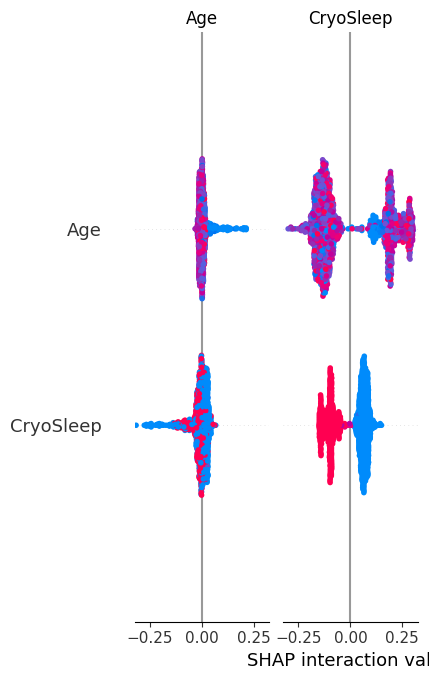

In [50]:
# For Random Forest, using shap.Explainer with a background dataset is often more efficient
# We can use a sample of the training data as the background
background_data_knn = X_train_knn.sample(100, random_state=42) # Use a smaller sample for faster computation

# Convert boolean columns to int for SHAP in background_data_knn
background_data_knn_numeric = background_data_knn.copy()
for col in background_data_knn_numeric.columns:
    if background_data_knn_numeric[col].dtype == 'bool':
        background_data_knn_numeric[col] = background_data_knn_numeric[col].astype(int)

# Convert boolean columns to int for SHAP in X_val_knn
X_val_knn_numeric = X_val_knn.copy()
for col in X_val_knn_numeric.columns:
    if X_val_knn_numeric[col].dtype == 'bool':
        X_val_knn_numeric[col] = X_val_knn_numeric[col].astype(int)

# Create a SHAP Explainer
explainer_knn_rf = shap.Explainer(final_rf_model_knn, background_data_knn_numeric)

# Calculate SHAP values for the validation set
shap_values_knn_rf = explainer_knn_rf(X_val_knn_numeric)

# Visualize the SHAP values (e.g., summary plot)
print("\nRandom Forest with KNN Imputation SHAP Summary Plot:")
shap.summary_plot(shap_values_knn_rf, X_val_knn_numeric)


Random Forest Feature Importances (Random Forest with KNN Imputation):
CryoSleep          0.167741
Spa                0.147078
RoomService        0.138299
VRDeck             0.128792
FoodCourt          0.117655
ShoppingMall       0.104249
Age                0.074889
HomePlanet_1.0     0.050114
HomePlanet_2.0     0.024496
Cabin_Side_1.0     0.018404
Destination_2.0    0.010930
Destination_1.0    0.006468
VIP                0.002810
HomePlanet_0.6     0.001017
HomePlanet_0.4     0.000828
Cabin_Side_0.6     0.000785
Destination_1.6    0.000771
Cabin_Side_0.4     0.000751
HomePlanet_0.8     0.000680
HomePlanet_0.2     0.000582
Cabin_Side_0.8     0.000546
Cabin_Side_0.2     0.000413
Destination_1.4    0.000395
Destination_1.8    0.000382
HomePlanet_1.2     0.000367
Destination_1.2    0.000296
HomePlanet_1.6     0.000138
HomePlanet_1.4     0.000060
Destination_0.8    0.000039
Destination_0.4    0.000027
Destination_0.2    0.000000
Destination_0.6    0.000000
dtype: float64


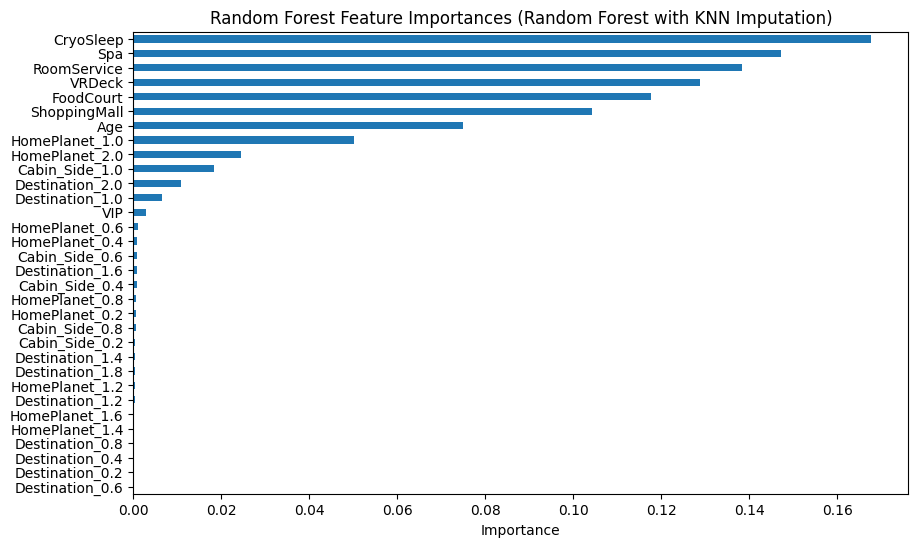

In [51]:
# Get and visualize feature importances
feature_importances_knn_rf_tuned = final_rf_model_knn.feature_importances_
feature_importances_series_knn_rf_tuned = pd.Series(feature_importances_knn_rf_tuned, index=X_train_knn.columns)
sorted_feature_importances_knn_rf_tuned = feature_importances_series_knn_rf_tuned.sort_values(ascending=False)

print("\nRandom Forest Feature Importances (Random Forest with KNN Imputation):")
print(sorted_feature_importances_knn_rf_tuned)

plt.figure(figsize=(10, 6))
sorted_feature_importances_knn_rf_tuned.plot(kind='barh')
plt.title('Random Forest Feature Importances (Random Forest with KNN Imputation)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()